In [1]:
import artm
import matplotlib.pyplot as plt
from matplotlib import colors
print(artm.version())

0.8.1


In [2]:
MODELS_NUMBER = 3
#all_colors = list(colors.cnames.keys())
all_colors = ['red', 'green', 'blue']

In [4]:
vectorizers = []
dictionaries = []
for i in range(MODELS_NUMBER):
    vectorizers.append(
        artm.BatchVectorizer(gather_dictionary=True, data_format='vowpal_wabbit', data_path='../rss_features.txt', target_folder="rss_batches")
    )
    dictionaries.append(vectorizers[-1].dictionary)

In [5]:
scores = []
for i in range(MODELS_NUMBER):
    scores.append([
        artm.SparsityPhiScore(name='SparsityPhiScore'),
        artm.SparsityThetaScore(name='SparsityThetaScore'),
        artm.TopTokensScore(name='TopTokensScore', num_tokens=20, dictionary=dictionaries[i]),
        artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3, dictionary=dictionaries[i]),
        artm.PerplexityScore(name='PerplexityScore', use_unigram_document_model=False, dictionary=dictionaries[i])
    ])

In [6]:
regularizers = [
    [
        artm.SmoothSparsePhiRegularizer(name='SmootSparsePhi', tau=2),
        artm.SmoothSparseThetaRegularizer(name='SmootSparseTheta', tau=-0.15)
    ],
    [
        artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=10)
    ],
    [
        artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi')
    ]
]

In [7]:
models = []
for i in range(MODELS_NUMBER):
    models.append(
        artm.ARTM(num_topics=30, cache_theta=True, scores=scores[i], regularizers=regularizers[i])
    )
    models[-1].initialize(dictionary=dictionaries[i])

In [9]:
for i in range(MODELS_NUMBER):
    models[i].fit_offline(batch_vectorizer=vectorizers[i], num_collection_passes=10)

Sparsity Phi: [0.0, 0.7416746880118885, 0.7416675110187952]
Sparsity Theta: [0.9579514355376424, 0.07797183659252625, 0.07797183659252625]
Kernel contrast: [0.056369687722435634, 0.7922684885404665, 0.7922761119273188]
Kernel purity: [0.03644095836561974, 0.3325200084436195, 0.3325104467235481]
Perplexity: [10393.114455739216, 3697.234162438293, 3697.235042628286]
Colors: [u'indigo', u'gold', u'hotpink']


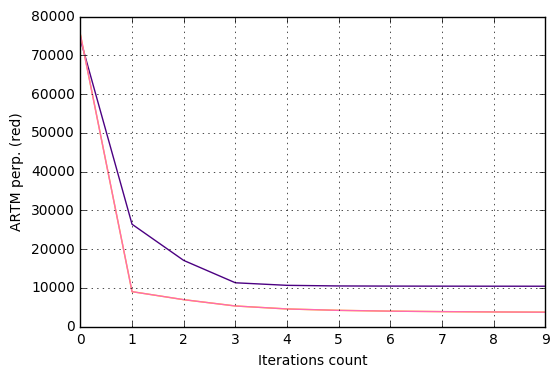

In [10]:
sparsity_phi = []
sparsity_theta = []
kernel_kontrasts = []
kernel_purity = []
perplexity = []
m_colors = []
lines = []
for i in range(MODELS_NUMBER):
    sparsity_phi.append(models[i].score_tracker['SparsityPhiScore'].last_value)
    sparsity_theta .append(models[i].score_tracker['SparsityThetaScore'].last_value)
    kernel_kontrasts.append(models[i].score_tracker['TopicKernelScore'].last_average_contrast)
    kernel_purity.append(models[i].score_tracker['TopicKernelScore'].last_average_purity)
    perplexity.append(models[i].score_tracker['PerplexityScore'].last_value)
    lines.append(range(models[i].num_phi_updates))
    lines.append(models[i].score_tracker['PerplexityScore'].value)
    lines.append(all_colors[i])
    m_colors.append(all_colors[i])
plt.xlabel('Iterations count')
plt.ylabel('ARTM perp. (red)')
print('Sparsity Phi: {}'.format(sparsity_phi))
print('Sparsity Theta: {}'.format(sparsity_theta))
print('Kernel contrast: {}'.format(kernel_kontrasts))
print('Kernel purity: {}'.format(kernel_purity))
print('Perplexity: {}'.format(perplexity))
print('Colors: {}'.format(m_colors))
plt.plot(*lines, linewidth=1)
plt.grid(True)
plt.show()

Colors: [u'indigo', u'gold', u'hotpink']


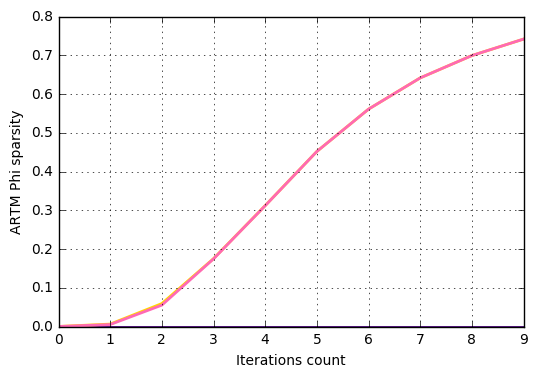

Colors: [u'indigo', u'gold', u'hotpink']


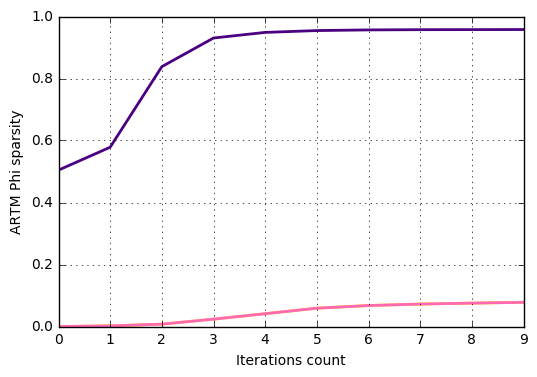

In [11]:
lines = []
m_colors = []
for i in range(MODELS_NUMBER):
    lines.append(range(models[i].num_phi_updates))
    lines.append(models[i].score_tracker['SparsityPhiScore'].value)
    lines.append(all_colors[i])
    m_colors.append(all_colors[i])
print('Colors: {}'.format(m_colors))
plt.plot(*lines, linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('ARTM Phi sparsity')
plt.grid(True)
plt.show()

lines = []
m_colors = []
for i in range(MODELS_NUMBER):
    lines.append(range(models[i].num_phi_updates))
    lines.append(models[i].score_tracker['SparsityThetaScore'].value)
    lines.append(all_colors[i])
    m_colors.append(all_colors[i])
print('Colors: {}'.format(m_colors))
plt.plot(*lines, linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('ARTM Phi sparsity')
plt.grid(True)
plt.show()

In [12]:
for topic_name in models[0].topic_names:
    print topic_name, ':'
    for i in range(MODELS_NUMBER):
        print 'model_{}: '.format(i),
        for token in models[i].score_tracker['TopTokensScore'].last_tokens[topic_name]:
            print token, ',',
        print('\n')
    print('\n')

topic_0 :
model_0:  халықаралық , арналған , өтуде , көрме , оқо , post_985|rss , өнеркәсібіне , тоқыма , дамыт , өтті , коммерциян , жөнінде , электрондық , post_1289|rss , қызылордада , подоконник , подсесть , post_6509|rss , коул , помидорный , 

model_1:  0 , 1 , 2 , использовать , это , работа , строка , мочь , следующий , файл , система , весь , 3 , использование , библиотека , который , статья , c , изменение , помощь , 

model_2:  0 , 1 , 2 , использовать , это , работа , строка , мочь , следующий , файл , система , весь , 3 , использование , библиотека , который , статья , c , изменение , помощь , 



topic_1 :
model_0:  покидать , джастин , полиция , питер , пышақпен , post_381|rss , roberto , қызметкері , жасаған , post_12635|rss , ши , шабуыть , төрт , caval , дундас , post_12671|rss , brioni , сотталда , тұрғынға , павлодард , 

model_1:  год , компания , сервис , москва , проект , свой , который , октябрь , запустить , это , ноябрь , московский , стать , фильм , рассказат